SECOND-YEAR-PROJECT 
(BY:- HARSH GOYAL)
ROLLNUMBER:-1900290130065
BRANCH-IT
KIET GROUP OF INSTITUTIONS(GHAZIABAD)

"PROJECT-LOAN PREDICTION MODEL"  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


in this project  we are going to use two dataset one for training the model that is training dataset and another that is testing dataset.

so now lets import our trained dataset.

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape
dataset.iloc[:,:].isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [8]:
dataset.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [9]:
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,63,7,70
1.0,85,325,410
All,148,332,480


<AxesSubplot:>

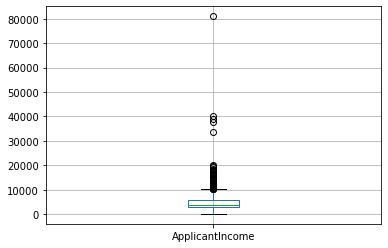

In [10]:
dataset.boxplot(column='ApplicantIncome')

<AxesSubplot:>

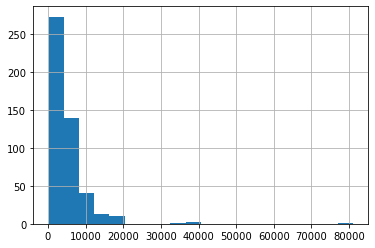

In [11]:
dataset['ApplicantIncome'].hist(bins=20)

now lets also explore coapplicant income through histogram

<AxesSubplot:>

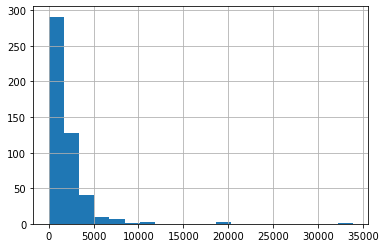

In [12]:
dataset['CoapplicantIncome'].hist(bins=20)

so the coapplicant income histogram is also rightscaled

so we have to normalize this as well

so now lets understand the relationship between the applicant;s income and their education through boxplot

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

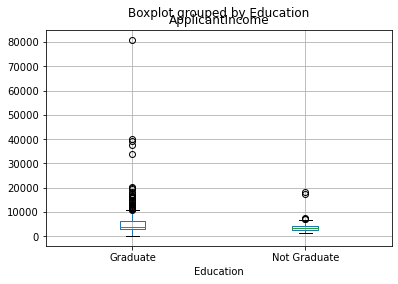

In [13]:
dataset.boxplot(column='ApplicantIncome', by= 'Education')

so from this graph we can infer that the median salary doesnot vary toomuch for who is graduate and who is not graduate  and in graduate some applicant have higher salary  than  the nongraduate

<AxesSubplot:>

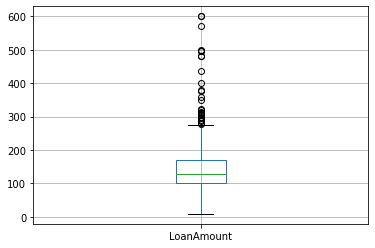

In [14]:
dataset.boxplot(column='LoanAmount')

lets also draw a histogram for loan amount variable

basically we have to normalize so we will use log function
and lets also visulaise histogram for log values we are calculating

<AxesSubplot:>

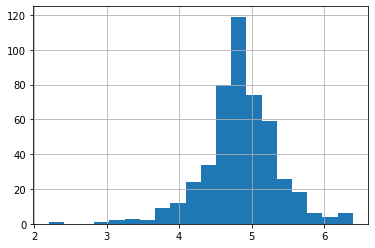

In [15]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

moving ahead lets see how many missing values are there in the each variable

In [16]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

so lets try and handle these missing values by filling these missing values

In [17]:
dataset['Gender'].fillna(dataset['Gender'].mode(),inplace=True)

In [18]:
dataset['Married'].fillna(dataset['Dependents'].mode(),inplace=True)

In [19]:
dataset['Dependents'].fillna(dataset['Dependents'].mode(),inplace=True)

In [20]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode(),inplace=True)

In [21]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [22]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode(),inplace=True)

In [23]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode(),inplace=True)

so Now we have handeled all the missing value in each variable

In [24]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

 so now as u can see that there are no missing values in each of the variable

so now as we have seen that aplicant income and coapplicant income both were right skewed so now lets normalize them

so now instead of normalizing the applicant income and coapplicant income seperately lets do it together by finding out the sum of applicant income and coapplicant income and then using the log to normalize them

In [25]:
dataset['TotalIncome']= dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log']= np.log(dataset['TotalIncome'])

<AxesSubplot:>

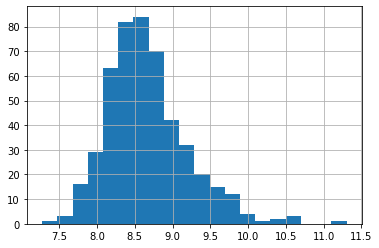

In [26]:
dataset['TotalIncome_log'].hist(bins=20)

so now as we can see through the histogram that the value are completely normalized

so moving ahead lets see how a datasetset looks

In [27]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872


so by looking at the dataset as we can see that we have handled all the missing values and also some extra columns have been added because of finding the log of some of the variables 

so as now we have normalized and handled the missing values lets divide our dataset into dependent and independent variables. 

so x is going to represent all the independent variables so lets store them into x and lets y store the dependent variables that we are going to predict which is the loan eligibility status

In [28]:
x=dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y=dataset.iloc[:,12].values

lets see how x variable looks like

In [29]:
x


array([['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.787491742782046, 4941.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

now lets see how y variable looks like

In [30]:
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

now lets split our dataset into train and test dataset by using train test split by importing sklearn 

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=0)

now we have divided the train and test dataset into the ratio of 80% and 20% respectively

now we have set the random state 0 as we dont want to change the result in every cycle

In [32]:
print(x_train)

[['Male' 'Yes' '3+' ... 1.0 4.727387818712341 3095.0]
 ['Female' 'No' '0' ... 1.0 3.828641396489095 2378.0]
 ['Female' 'Yes' '1' ... 1.0 4.90527477843843 4666.0]
 ...
 ['Male' 'No' '0' ... 1.0 5.497168225293202 9166.0]
 ['Male' 'Yes' '0' ... 1.0 4.787491742782046 6296.0]
 ['Male' 'Yes' '0' ... 0.0 4.0943445622221 2221.0]]


so there are some categorical values over here so now as it to be understandale by machine we need to convert it into 0 and 1 so hence we will be using LabelEncoder  for converting these values into the 0s and 1's  and 2's

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [34]:
for i in range(0,5):
    x_train[:,i]= labelencoder_x.fit_transform(x_train[:,i])

In [35]:
x_train[:,7]= labelencoder_x.fit_transform(x_train[:,7])

In [36]:
x_train

array([[1, 1, 3, ..., 1.0, 4.727387818712341, 32],
       [0, 0, 0, ..., 1.0, 3.828641396489095, 7],
       [0, 1, 1, ..., 1.0, 4.90527477843843, 118],
       ...,
       [1, 0, 0, ..., 1.0, 5.497168225293202, 287],
       [1, 1, 0, ..., 1.0, 4.787491742782046, 216],
       [1, 1, 0, ..., 0.0, 4.0943445622221, 5]], dtype=object)

so we have converted all the categorical values into 0's 1's and 2's and let apply it on other variables also

In [37]:
LabelEncoder_y=LabelEncoder()
y_train= LabelEncoder_y.fit_transform(y_train)


In [38]:
y_train


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

so all the yes and no have been converted to 0;s and 1's 

and lets apply it to other variables as well that is x_test and y_test

In [39]:
for i in range(0,5):
    x_test[:,i]= labelencoder_x.fit_transform(x_test[:,i])

In [40]:
x_test[:,7]= labelencoder_x.fit_transform(x_test[:,7])

In [41]:
x_test

array([[1, 1, 0, 1, 6, 1.0, 4.890349128221754, 45],
       [1, 1, 0, 0, 6, 1.0, 5.616771097666572, 74],
       [1, 1, 0, 0, 3, 1.0, 4.290459441148391, 39],
       [1, 1, 3, 1, 6, 1.0, 5.153291594497779, 31],
       [1, 1, 0, 0, 6, 1.0, 4.90527477843843, 0],
       [1, 1, 1, 0, 6, 1.0, 5.560681631015528, 91],
       [1, 1, 2, 0, 6, 1.0, 4.997212273764115, 50],
       [1, 1, 0, 0, 6, 1.0, 4.700480365792417, 44],
       [0, 0, 0, 0, 6, 1.0, 5.41610040220442, 85],
       [1, 1, 2, 1, 6, 1.0, 4.700480365792417, 49],
       [1, 0, 0, 0, 6, 1.0, 5.231108616854587, 77],
       [1, 1, 2, 1, 6, 1.0, 4.727387818712341, 2],
       [1, 1, 2, 0, 6, 0.0, 5.552959584921617, 78],
       [1, 1, 0, 0, 6, 1.0, 4.718498871295094, 22],
       [1, 1, 1, 0, 6, 1.0, 5.043425116919247, 80],
       [1, 0, 0, 0, 6, 1.0, 4.48863636973214, 63],
       [1, 0, 0, 1, 2, 1.0, 3.2188758248682006, 18],
       [1, 1, 2, 0, 6, 1.0, 4.477336814478207, 68],
       [1, 1, 2, 1, 3, 0.0, 3.8066624897703196, 5],
       [1, 1, 2,

In [42]:
LabelEncoder_y=LabelEncoder()
y_test= LabelEncoder_y.fit_transform(y_test)


In [43]:
y_test

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1])

now moving ahead weare going to scale our dataset.
as analysis and prediction becomes much easier after it

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)


now that we have completed all the preprocessing, handling missing values,handling outliers,and scaling our dataset.

now lets start with applying algorithms on our dataset.

so the first algorithm we will be applying here is decision tree classifier
and lets see how accurately did it predict the outcome. so we will import the library and then create a instance of the decison tree.

In [45]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
DTClassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
y_pred= DTClassifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1])

In [47]:
from sklearn import metrics
print("the accuracy of the decision tree is",metrics.accuracy_score(y_pred,y_test))

the accuracy of the decision tree is 0.6875


In [48]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [49]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1])

In [50]:
print("the accuracy of the Naive Bayes is:",metrics.accuracy_score(y_pred,y_test))

the accuracy of the Naive Bayes is: 0.6875


In [51]:
testdata=pd.read_csv("train.csv")

In [52]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
testdata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)

In [55]:
testdata.isnull().sum()


Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

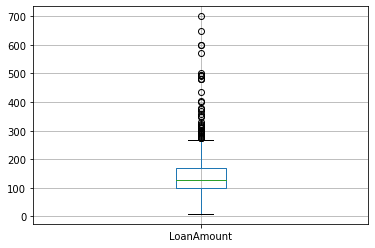

In [56]:
testdata.boxplot(column='LoanAmount')

<AxesSubplot:>

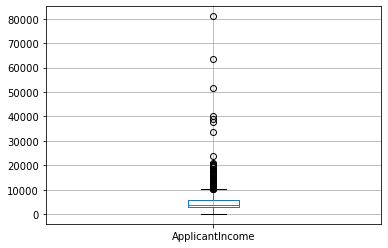

In [57]:
testdata.boxplot(column='ApplicantIncome')

In [58]:
testdata.LoanAmount=testdata.LoanAmount.fillna(testdata.LoanAmount.mean())

In [59]:
testdata['LoanAmount_log']=np.log(testdata['LoanAmount'])

In [60]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [61]:
testdata['TotalIncome']=testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome_log']=np.log(testdata['TotalIncome'])

In [62]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [63]:
test=testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [64]:
for i in range(0,5):
     test[:,i]=labelencoder_x.fit_transform(test[:,i])

In [65]:
test[:,7]=labelencoder_x.fit_transform(test[:,7])

In [66]:
test

array([[1, 0, 0, ..., 1.0, 4.986425672954842, 320],
       [1, 1, 1, ..., 1.0, 4.852030263919617, 333],
       [1, 1, 0, ..., 1.0, 4.189654742026425, 42],
       ...,
       [1, 1, 1, ..., 1.0, 5.53338948872752, 436],
       [1, 1, 2, ..., 1.0, 5.231108616854587, 416],
       [0, 0, 0, ..., 0.0, 4.890349128221754, 185]], dtype=object)

In [67]:
test=ss.fit_transform(test)

In [68]:
pred=NBClassifier.predict(test)

In [69]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,